<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#iris" data-toc-modified-id="iris-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>iris</a></span></li><li><span><a href="#glass" data-toc-modified-id="glass-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>glass</a></span></li><li><span><a href="#wine" data-toc-modified-id="wine-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>wine</a></span></li><li><span><a href="#real-image-segmentation" data-toc-modified-id="real-image-segmentation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>real image segmentation</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from sklearn.metrics import f1_score,adjusted_rand_score

# iris

In [2]:
panda=pd.read_csv('./iris.csv', header=None)
X=panda.iloc[1:,:-1].values.astype(np.float)
Y=panda.iloc[1:,-1].values.astype(np.float)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.8866666666666667
f1_score:0.8832938591974736
adjusted_rand_score:0.7195837484778037


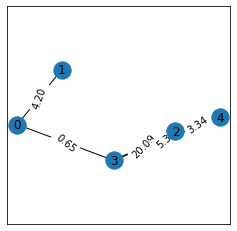

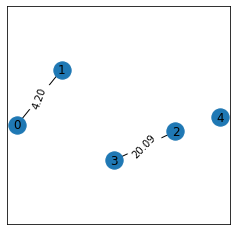

In [29]:
import api
imp.reload(api)

Y_pred=api.DGSFC.fit( X,
                      K_d=20,
                      search_n=10,
                      ratio=0.8,
                      level=1,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )
print(Y_pred)
print(Y.astype(np.int))
print(np.sum(Y_pred==Y)/Y.shape[0])

print( 'f1_score:{}'.format(f1_score(Y, Y_pred, average='weighted')) )
print( 'adjusted_rand_score:{}'.format(adjusted_rand_score(Y, Y_pred)) )

# glass

In [24]:
panda=pd.read_csv('./glass.csv', header=None)
X=panda.iloc[1:,:-1].values.astype(np.float)
Y=panda.iloc[1:,-1].values.astype(np.int)
Y_set=list(set(Y))
Y_map={Y_set[i]:i for i in range(len(Y_set))}
Y=np.array([Y_map[y] for y in Y])

[1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 3 1 1 0 3 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 2 3 1 1 1 3 0 1 1 3 3 1 3 1 1 1 1 0 0 1 1 1 1 1 3 3 3 1 3 3 3 3 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 3 0 1 1 0 1 0 2 3 3 4 3 3 1 3
 4 3 1 1 1 1 1 0 1 1 0 1 1 1 1 1 3 3 3 1 3 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1
 1 1 0 3 1 1 1 1 1 3 1 1 1 3 3 5 1 1 1 1 1 1 3 1 1 1 0 3 1 1 1 1 1 1 5 1 5
 1 1 1 1 2 1 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


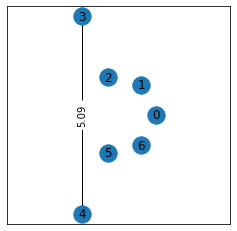

In [48]:
import api
imp.reload(api)

Y_pred=api.DGSFC.fit( X,
                      K_d=20,
                      search_n=20,
                      ratio=0.7,
                      level=1,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )
print(Y_pred)
print(Y.astype(np.int))
print(np.sum(Y_pred==Y)/Y.shape[0])

print( 'f1_score:{}'.format(f1_score(Y, Y_pred, average='weighted')) )
print( 'adjusted_rand_score:{}'.format(adjusted_rand_score(Y, Y_pred)) )

# wine

In [49]:
panda=pd.read_csv('./wine.csv', header=None)
X=panda.iloc[1:,:-1].values.astype(np.float)
Y=panda.iloc[1:,-1].values.astype(np.int)
Y_set=list(set(Y))
Y_map={Y_set[i]:i for i in range(len(Y_set))}
Y=np.array([Y_map[y] for y in Y])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 1 2 0 1 1 2 0 2 0 2 0
 0 1 1 2 0 3 1 1 2 2 3 1 2 2 2 1 2 2 2 1 1 0 2 1 1 1 1 1 3 1 1 2 1 2 1 3 0
 1 2 2 3 2 1 1 2 1 3 3 3 0 3 3 3 2 2 3 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
0.7303370786516854
f1_score:0.7235591038214944
adjusted_rand_score:0.4869597478584958


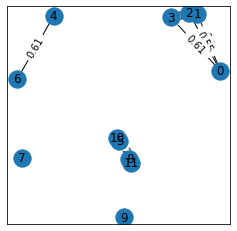

In [60]:
import api
imp.reload(api)

Y_pred=api.DGSFC.fit( X,
                      K_d=10,
                      search_n=5,
                      ratio=0.1,
                      level=1,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )
print(Y_pred)
print(Y.astype(np.int))
print(np.sum(Y_pred==Y)/Y.shape[0])

print( 'f1_score:{}'.format(f1_score(Y, Y_pred, average='weighted')) )
print( 'adjusted_rand_score:{}'.format(adjusted_rand_score(Y, Y_pred)) )

# real image segmentation

In [2]:
import matplotlib.image as imgplt
X = imgplt.imread('./westlake.jpg')
X = X.reshape(-1,3)

../utils/topo_graph.py:53: RuntimeWarning:

invalid value encountered in true_divide



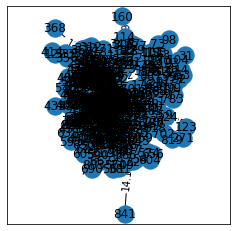

In [4]:
import api
imp.reload(api)

X_pred=api.DGSFC.fit( X,
                      K_d=10,
                      search_n=5,
                      ratio=0.1,
                      level=1,
                      plot=True,
                      pnum=30,
                      mp4=False,
                      fps=4,
                      figroot='/usr/data/gzy/DGC/results/circles',
                      mp4name='circles'
                     )